NON-LINEAR OPTIMISATION: CODING ASSIGNMENT 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Defining functions asked for in the assignment

In [2]:
def function_1(x, parameters):
    a, b, c = parameters
    return a*abs(x - b) + c

def function_2(x, parameters):
    a, b, c = parameters
    return a*x**2 + b*x + c

def function_3(x):
    return x**4 + 0.5*x**3 - 4*x**2

Defining gradients of above functions

In [3]:
def gradient_1(x, parameters):
    a, b, c = parameters
    return a*(x - b)/abs(x - b)

def gradient_2(x, parameters):
    a, b, c = parameters
    return 2*a*x + b

def gradient_3(x):
    return 4*x**3 + 1.5*x**2 -8*x

def double_gradient_3(x):
    return 12*x**2 + 3.0*x - 8

Defining all Optimisation Methods

In [4]:
def gradient_descent_var(initial_val, parameters, iterations, constant):
    iter_val = np.zeros([iterations+1, 1])
    iter_val[iterations] = iterations 
    x_val = np.zeros([iterations+1, 1])
    x_val[0] = initial_val
    for i in range(iterations):
        iter_val[i] = i
        alpha = constant/(i+1)**0.5
        x_val[i+1] = x_val[i] - alpha*gradient_1(x_val[i], parameters)
    return iter_val, x_val

def gradient_descent_const(initial_val, parameters, iterations, alpha_val):
    iter_val = np.zeros([iterations+1, 1])
    iter_val[iterations] = iterations 
    x_val = np.zeros([iterations+1, 1])
    x_val[0] = initial_val
    for i in range(iterations):
        iter_val[i] = i
        x_val[i+1] = x_val[i] - alpha_val*gradient_2(x_val[i], parameters)
    return iter_val, x_val

def gradient_descent_ball(initial_val, iterations, alpha_val, beta_val):
    iter_val = np.zeros([iterations+1, 1])
    iter_val[iterations] = iterations 
    x_val = np.zeros([iterations+1, 1])
    x_val[0] = initial_val
    x_val[1] = x_val[0] - alpha_val*gradient_3(x_val[0])
    for i in range(1, iterations):
        iter_val[i] = i
        x_val[i+1] = x_val[i] - alpha_val*gradient_3(x_val[i]) + beta_val*(x_val[i]-x_val[i-1])
    return iter_val, x_val

def newton_method(initial_val, iterations):
    iter_val = np.zeros([iterations+1, 1])
    iter_val[iterations] = iterations 
    x_val = np.zeros([iterations+1, 1])
    x_val[0] = initial_val
    for i in range(iterations):
        iter_val[i] = i
        x_val[i+1] = x_val[i] - gradient_3(x_val[i])/double_gradient_3(x_val[i])
    return iter_val, x_val


Extra: To find Optimum alpha, iterations, constant

In [6]:
# def optimum_1(initial_val, parameters, x_star, max_iter, const_precision):
#     const_optim = []
#     c_val = np.linspace(const_precision, 1, int(1/const_precision))
#     for c in c_val:
#         x_iter = np.zeros([max_iter+1, 1]) #x_iter is x-x* at final iteration
#         x_iter[0] = initial_val-x_star
#         for i in range(1, max_iter+1):
#             iter_val, x_val = gradient_descent_var(initial_val, parameters, i, c)
#             x_iter[i] = x_val[i]-x_star #i is final iteration
#         const_optim.append(abs(x_iter).argmin()) #appending most optimum #iterations for a given constant
#     const_optim = np.array(const_optim)
#     return c_val[const_optim.argmin()], const_optim.min(),  #returning const for most optimum #iterations

In [7]:
# def optimum_2(initial_val, parameters, x_star, max_iter, alpha_precision):
#     alpha_optim = []
#     alpha_val = np.linspace(alpha_precision, 1, int(1/alpha_precision))
#     for alpha in alpha_val:
#         x_iter = np.zeros([max_iter+1, 1])
#         x_iter[0] = initial_val-x_star
#         for i in range(1, max_iter+1):
#             iter_val, x_val = gradient_descent_const(initial_val, parameters, i, alpha)
#             x_iter[i] = x_val[i]-x_star
#         alpha_optim.append(abs(x_iter).argmin())
#     alpha_optim = np.array([i for i in alpha_optim if i != 0]) #to remove trivial cases due to divergence
#     return alpha_val[alpha_optim.argmin()], alpha_optim.min()

Defining functions to return appropriate values for alpha, beta, inital value for different conditions

In [8]:
def alpha_check(initial_val, parameters, iterations, alpha_precision):
    a, b, c = parameters
    f_min = c-b**2/(4*a)
    threshold = 10**(-1)
    alpha_convg = []
    alpha_oscil = []
    alpha_div = []
    for alpha in np.linspace(alpha_precision, 1, int(1/alpha_precision)):
        iter_val, x_val = gradient_descent_const(initial_val, parameters, iterations, alpha)
        f_val = function_2(x_val, parameters)
        one_sid_convg = all(f_val[j] >= f_val[j+1] for j in range(len(f_val)-1))
        error = abs(float(f_val[iterations]-f_min))
        if one_sid_convg == True and error <= threshold:
            alpha_convg.append(alpha)
        elif one_sid_convg == False and error <= threshold:
            alpha_oscil.append(alpha)
        else:
            alpha_div.append(alpha)          
    return alpha_convg, alpha_oscil, alpha_div

def beta_check(initial_val, local_min, global_min, iterations, alpha_val, beta_precision):
    threshold = 10**(-1)
    beta_convg_loc = []
    beta_convg_glb = []
    beta_div = []
    for beta in np.linspace(beta_precision, 1, int(1/beta_precision)):
        iter_val, x_val = gradient_descent_ball(initial_val, iterations, alpha_val, beta)
        f_val = function_3(x_val)
        error1 = abs(float(f_val[iterations]-local_min))
        error2 = abs(float(f_val[iterations]-global_min))
        if error1 <= threshold:
            beta_convg_loc.append(beta)
        elif error2 <= threshold:
            beta_convg_glb.append(beta)
        else:
            beta_div.append(beta)          
    return beta_convg_loc, beta_convg_glb, beta_div

def initial_val_check(local_min, global_min, iterations, inital_val_range):
    threshold = 10**(-1)
    initial_val_convg_loc = []
    inital_val_convg_glb = []
    for initial_val in inital_val_range:
        iter_val, x_val = newton_method(initial_val, iterations)
        f_val = function_3(x_val)
        error1 = abs(float(f_val[iterations]-local_min))
        error2 = abs(float(f_val[iterations]-global_min))
        if error1 <= threshold:
            initial_val_convg_loc.append(initial_val)
        elif error2 <= threshold:
            inital_val_convg_glb.append(initial_val)  
    return initial_val_convg_loc, inital_val_convg_glb

Q1: Variable Step Size Gradient Descent

In [9]:
#Q1
initial_val = 1.2
parameters = [1.5, 2, -3]#change signs here
x_star = parameters[1]
f_star = parameters[2]

iterations = 20 #use 7 for case b and 20 for cases a and c
constant = 0.3

time, x_val = gradient_descent_var(initial_val, parameters, iterations, constant)
f_val = function_1(x_val, parameters)

x_vec = np.linspace(x_star-4, x_star+4, 100)
fx_vec = function_1(x_vec, parameters)

[0.00031104] [0.00046656]


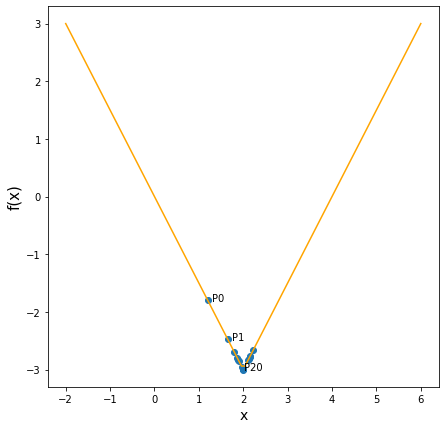

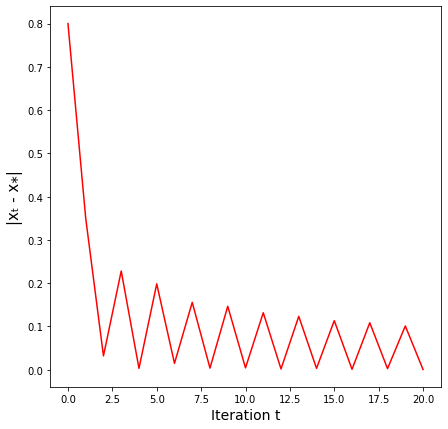

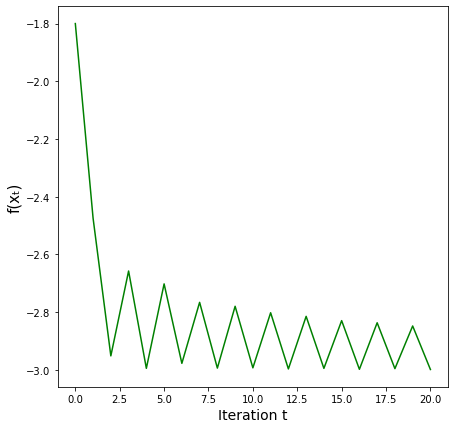

In [10]:
#Required plots
for plot in ['demonstration', 'error', 'function']:
    if plot == 'demonstration':
        plt.figure(figsize = (7, 7))
        plt.scatter(x_val, f_val)
        plt.plot(x_vec, fx_vec, 'orange')
        point_num = 0
        for x, y in zip(x_val, f_val):
            if point_num in [0, 1, 20]:
                label = f"P{point_num}"
                plt.annotate(label, (x,y), textcoords="offset points", xytext=(10,-1), ha='center')
            point_num += 1
        plt.xlabel('x', fontsize=14)
        plt.ylabel('f(x)', fontsize=15)
    elif plot == 'error':
        plt.figure(figsize = (7, 7))
        plt.plot(time, abs(x_val-x_star), 'r')
        plt.xlabel('Iteration t', fontsize=14)
        plt.ylabel('|xₜ - x⁎|', fontsize=15)
    else:
        plt.figure(figsize = (7, 7))
        plt.plot(time, f_val, 'g')
        plt.xlabel('Iteration t', fontsize=14)
        plt.ylabel('f(xₜ)', fontsize=15)
print(abs(x_val[iterations]-x_star), abs(f_val[iterations]-f_star))

Q2: Constant Step Size Gradient Descent for 3 different conditions on step size

In [11]:
#Q2
initial_val = -4
parameters = [1.5, 2, -3]
x_star = -0.5*parameters[1]/parameters[0]
f_star = parameters[2] - parameters[1]**2/(4*parameters[0])

iterations = 20 #iterations is 20 for both convergence cases and 5 for divergence (to prevent massive graph)

# Same alpha values work across all 3 cases
# Values picked using alpha_check functions
alpha_val = 0.1 #0.1 for convergence, 0.4 for oscillation then convergence, 0.8 for divergence

lists = alpha_check(initial_val, parameters, iterations, 0.1)
print(lists[0])
print(lists[1])
print(lists[2])

time, x_val = gradient_descent_const(initial_val, parameters, iterations, alpha_val)
f_val = function_2(x_val, parameters)
r = abs(x_val).max() + 1

x_vec = np.linspace(x_star-r, x_star+r, 100)
fx_vec = function_2(x_vec, parameters)

[0.1, 0.2, 0.5, 0.6]
[0.30000000000000004, 0.4]
[0.7000000000000001, 0.8, 0.9, 1.0]


[0.00265974] [1.06113429e-05]


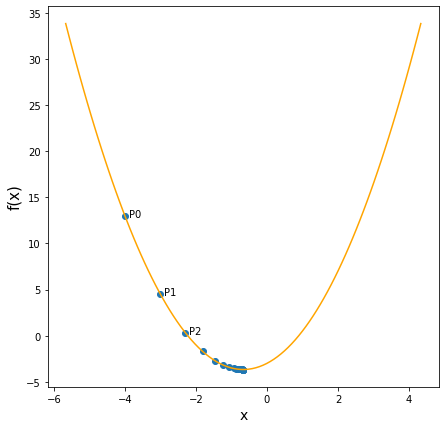

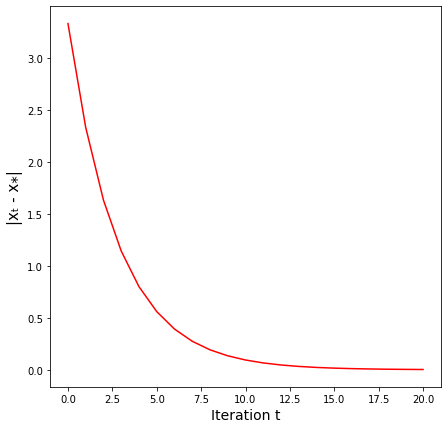

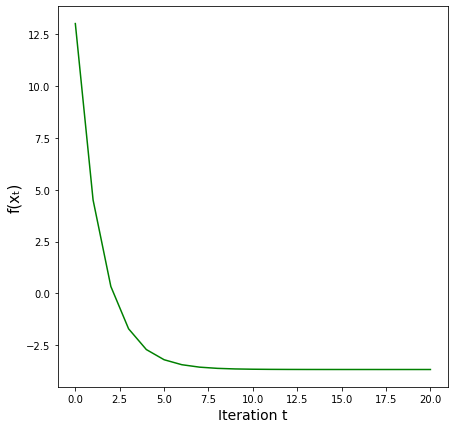

In [12]:
#Required plots
for plot in ['demonstration', 'error', 'function']:
    if plot == 'demonstration':
        plt.figure(figsize = (7, 7))
        plt.scatter(x_val, f_val)
        plt.plot(x_vec, fx_vec, 'orange')
        point_num = 0
        for x, y in zip(x_val, f_val):
            if point_num<3 or alpha_val == 0.8:
                label = f"P{point_num}"
                point_num += 1
                plt.annotate(label, (x,y), textcoords="offset points", xytext=(10,-1), ha='center')
        plt.xlabel('x', fontsize=14)
        plt.ylabel('f(x)', fontsize=15)
    elif plot == 'error':
        plt.figure(figsize = (7, 7))
        plt.plot(time, abs(x_val-x_star), 'r')
        plt.xlabel('Iteration t', fontsize=14)
        plt.ylabel('|xₜ - x⁎|', fontsize=15)
    else:
        plt.figure(figsize = (7, 7))
        plt.plot(time, f_val, 'g')
        plt.xlabel('Iteration t', fontsize=14)
        plt.ylabel('f(xₜ)', fontsize=15)
print(abs(x_val[iterations]-x_star), abs(f_val[iterations]-f_star))

Q3: Heavy Ball Momentum Gradient Descent

-1.614088614088614
-9.000008999837661e-06
-3.0000029997978572e-06
3.0000030002419464e-06
9.00000900028175e-06
1.2390822390822391
1.2390882390882396
1.2390942390942392


Text(0, 0.5, 'f(x)')

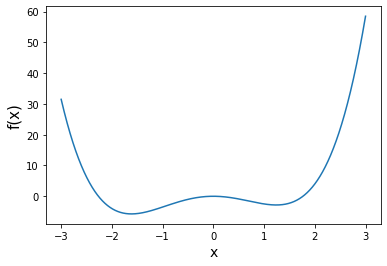

In [13]:
# for this value of t and 100*t, the code below seems to return the local, global min and local maxima
t = 10**(4)
space = np.linspace(-3, 3, 100*t)
for i in space:
    if abs(gradient_3(i))<=1/t:
        print(i) #extremum
plt.plot(space, function_3(space))
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=15)

In [14]:
#Initialising important variables
x_glb = -1.614
f_glb = function_3(x_glb)
x_loc = 1.239
f_loc = function_3(x_loc)
x_locmax = 0
f_locmax = function_3(x_locmax)

initial_val = 2
iterations = 20
alpha_val = 0.1

lists = beta_check(initial_val, f_loc, f_glb, iterations, alpha_val, 0.1)
print(lists[0])
print(lists[1])
print(lists[2])
#Using 0.6, 0.4, 0.9 as beta values

beta_val = 0.6 #change beta here

#star denotes the minima
if beta_val in lists[0]:
    x_star = x_loc
    f_star = f_loc
else:
    x_star = x_glb
    f_star = f_glb

#Running heavy ball momentum gradient descent
time, x_val = gradient_descent_ball(initial_val, iterations, alpha_val, beta_val)
f_val = function_3(x_val)
r = abs(x_val).max() + 1

x_vec = np.linspace(-r, r, 100)
fx_vec = function_3(x_vec)

[0.5, 0.6, 0.8]
[0.1, 0.2, 0.30000000000000004, 0.4]
[0.7000000000000001, 0.9, 1.0]


/var/folders/4y/nn0fgj3n78gbhc8c7n171c340000gn/T/ipykernel_18038/1111080331.py:10: RuntimeWarning: overflow encountered in power
  return x**4 + 0.5*x**3 - 4*x**2
/var/folders/4y/nn0fgj3n78gbhc8c7n171c340000gn/T/ipykernel_18038/1111080331.py:10: RuntimeWarning: overflow encountered in square
  return x**4 + 0.5*x**3 - 4*x**2
/var/folders/4y/nn0fgj3n78gbhc8c7n171c340000gn/T/ipykernel_18038/1111080331.py:10: RuntimeWarning: invalid value encountered in subtract
  return x**4 + 0.5*x**3 - 4*x**2


[0.05586242] [0.02118924]


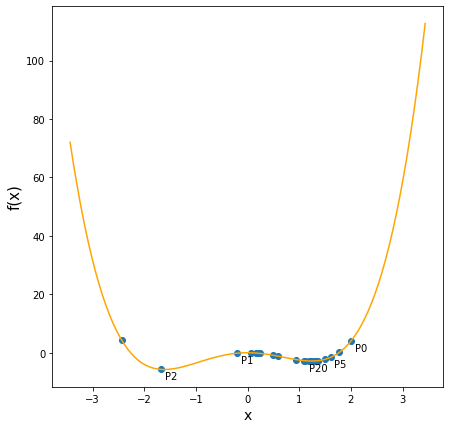

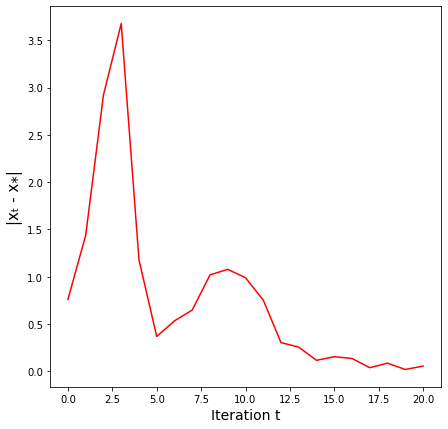

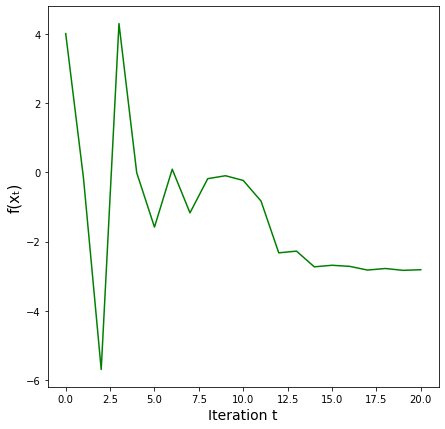

In [15]:
#Plots of the required curves
for plot in ['demonstration', 'error', 'function']:
    if plot == 'demonstration':
        plt.figure(figsize = (7, 7))
        plt.scatter(x_val, f_val)
        plt.plot(x_vec, fx_vec, 'orange')
        point_num = 0
        for x, y in zip(x_val, f_val):
            if point_num in [0, 1, 2,  5, 20]:
                label = f"P{point_num}"
                plt.annotate(label, (x,y), textcoords="offset points", xytext=(10,-10), ha='center')
            point_num += 1
        plt.xlabel('x', fontsize=14)
        plt.ylabel('f(x)', fontsize=15)
    elif plot == 'error':
        plt.figure(figsize = (7, 7))
        plt.plot(time, abs(x_val-x_star), 'r')
        plt.xlabel('Iteration t', fontsize=14)
        plt.ylabel('|xₜ - x⁎|', fontsize=15)
    else:
        plt.figure(figsize = (7, 7))
        plt.plot(time, f_val, 'g')
        plt.xlabel('Iteration t', fontsize=14)
        plt.ylabel('f(xₜ)', fontsize=15)
print(abs(x_val[iterations]-x_star), abs(f_val[iterations]-f_star))

Q4: Newton Method

In [16]:
#Initialising parameters and running initial_val_check
iterations = 20

inital_val_range = np.linspace(-5, 5, 10)
lists = initial_val_check(f_loc, f_glb, iterations, inital_val_range)
print(lists[0]) 
print(lists[1])

initial_val = -5 #Using 5 for local and -5 for glb

if initial_val in lists[0]:
    x_star = x_loc
    f_star = f_loc
else:
    x_star = x_glb
    f_star = f_glb

time, x_val = newton_method(initial_val, iterations)
f_val = function_3(x_val)

r = abs(x_val).max() + 1

x_vec = np.linspace(-r, r, 100)
fx_vec = function_3(x_vec)

#Rate of convergence is Linear
myu = [float(abs(x_val[i]-x_star)/abs(x_val[i+1]-x_star)) for i in range(iterations)]
myu.insert(iterations, myu[iterations-1])
myu = np.array(myu).reshape(iterations+1,1)

[1.666666666666667, 2.7777777777777786, 3.8888888888888893, 5.0]
[-5.0, -3.888888888888889, -2.7777777777777777, -1.6666666666666665]


[8.90263142e-05] [7.2995844e-08]
[[ 1.81971666]
 [ 2.07493304]
 [ 2.67668659]
 [ 4.60688621]
 [15.45156625]
 [42.9557193 ]
 [ 1.23072266]
 [ 1.0000046 ]
 [ 1.        ]
 [ 1.        ]
 [ 1.        ]
 [ 1.        ]
 [ 1.        ]
 [ 1.        ]
 [ 1.        ]
 [ 1.        ]
 [ 1.        ]
 [ 1.        ]
 [ 1.        ]
 [ 1.        ]
 [ 1.        ]]


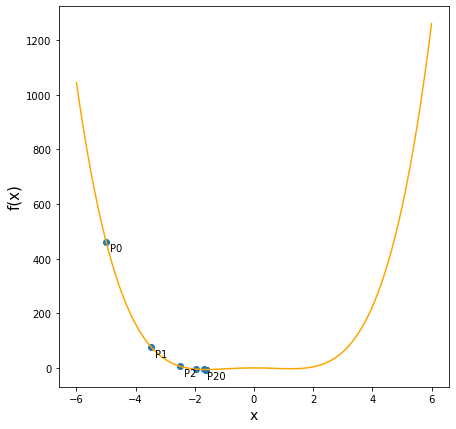

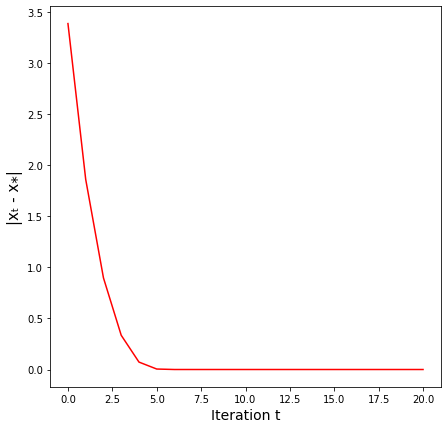

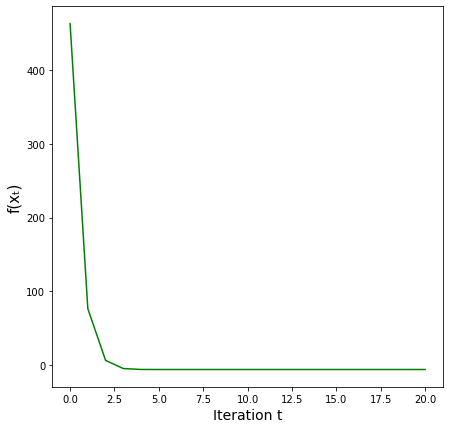

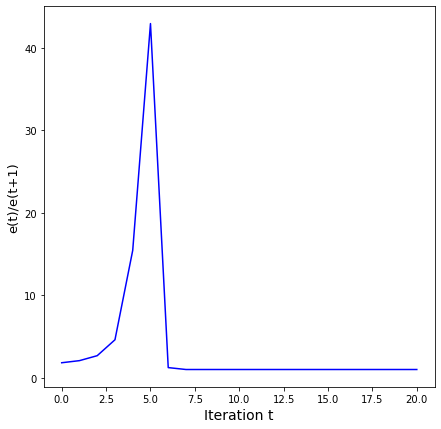

In [17]:
#Plots of the required curves
for plot in ['demonstration', 'error', 'function', 'convergence']:
    if plot == 'demonstration':
        plt.figure(figsize = (7, 7))
        plt.scatter(x_val, f_val)
        plt.plot(x_vec, fx_vec, 'orange')
        point_num = 0
        for x, y in zip(x_val, f_val):
            if point_num in [0, 1, 2, 20]:
                label = f"P{point_num}"
                plt.annotate(label, (x,y), textcoords="offset points", xytext=(10,-10), ha='center')
            point_num += 1
        plt.xlabel('x', fontsize=14)
        plt.ylabel('f(x)', fontsize=15)
    elif plot == 'error':
        plt.figure(figsize = (7, 7))
        plt.plot(time, abs(x_val-x_star), 'r')
        plt.xlabel('Iteration t', fontsize=14)
        plt.ylabel('|xₜ - x⁎|', fontsize=15)
    elif plot == 'function':
        plt.figure(figsize = (7, 7))
        plt.plot(time, f_val, 'g')
        plt.xlabel('Iteration t', fontsize=14)
        plt.ylabel('f(xₜ)', fontsize=15)
    else:
        plt.figure(figsize = (7, 7))
        plt.plot(time, myu, 'b')
        plt.xlabel('Iteration t', fontsize=14)
        plt.ylabel('e(t)/e(t+1)', fontsize=13)
print(abs(x_val[iterations]-x_star), abs(f_val[iterations]-f_star))
print(myu)